# 01.Importing libraries

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Importing data

In [2]:
# Defining the path
path = r'C:\Users\franc\Documents\01-2023 Instacart Basket Analysis'

In [3]:
# Import the most up-to-date project data
df_ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_combined.pkl'))

# 0.3 Creating visualizations

In [4]:
# General checkings
df_ords_prods_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 31 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 int64   
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   new_customer            bool    
 7   product_id              int64   
 8   add_to_cart_order       int64   
 9   reordered               int64   
 10  product_name            object  
 11  aisle_id                int64   
 12  department_id           int64   
 13  prices                  float64 
 14  _merge                  category
 15  busiest_days            object  
 16  busiest_day             object  
 17  busiest_hours           object  
 18  max_order               int64   
 19  loyalty_flag            object  
 20  average_price           float64 
 21  averag

In [5]:
df_ords_prods_cust.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,average_order_flag,median_prior_order,frequency_order_flag,gender,state,age,date_joined,n_dependants,marital_status,income
0,2539329,1,1,2,8,-1.0,False,196,1,0,...,Low spender,18.457627,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Low spender,18.457627,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,False,196,1,1,...,Low spender,18.457627,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Low spender,18.457627,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,False,196,1,1,...,Low spender,18.457627,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423


In [6]:
df_ords_prods_cust.shape

(32404859, 31)

<AxesSubplot:>

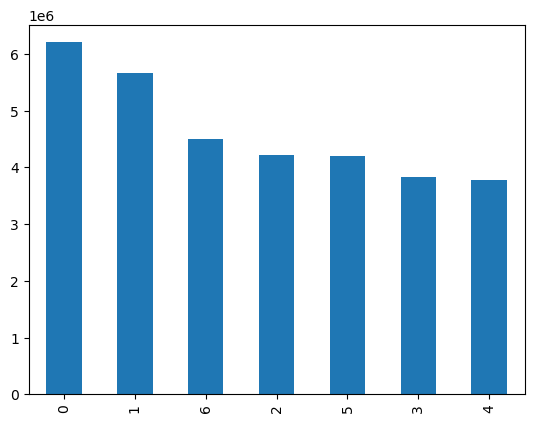

In [7]:
#Creating a  bar chart
df_ords_prods_cust['orders_day_of_week'].value_counts().plot.bar()

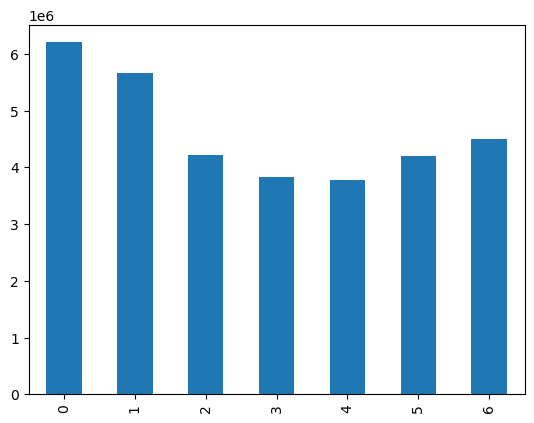

In [8]:
# Sorting by orders_day_of_week (index)
bar_odow = df_ords_prods_cust['orders_day_of_week'].value_counts().sort_index().plot.bar()

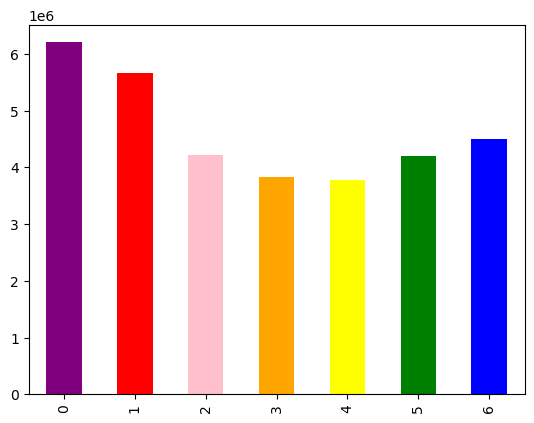

In [9]:
# Create a bar chart with colours
bar_odow = df_ords_prods_cust['orders_day_of_week'].value_counts().sort_index().plot.bar(color=['purple','red','pink','orange','yellow','green','blue'])

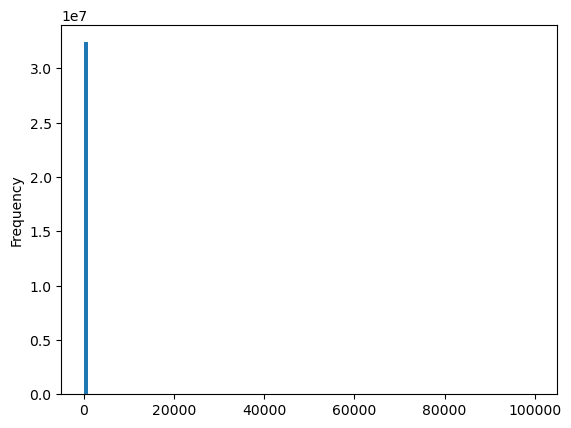

In [10]:
# Creating a histogram for prices colums
histogram_prices = df_ords_prods_cust['prices'].plot.hist(bins = 100)

In [11]:
# Checking for outliers
df_ords_prods_cust['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [12]:
df_ords_prods_cust['prices'].max()

99999.0

In [13]:
# Fixing the issue with the outliers
df_ords_prods_cust.loc[df_ords_prods_cust['prices'] >100, 'prices'] = np.nan

In [14]:
df_ords_prods_cust['prices'].max()

25.0

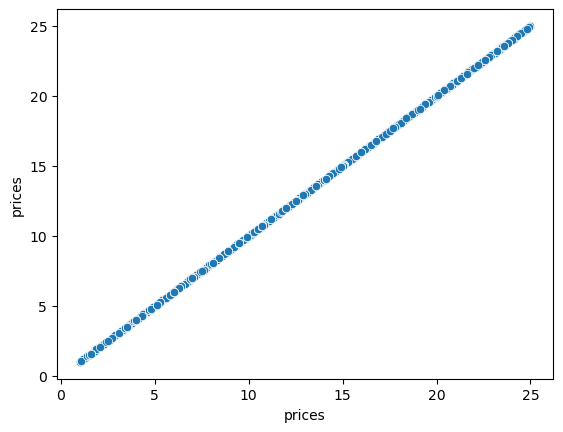

In [15]:
# Creating a scatterplot
scatterplot_prices = sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_prods_cust)

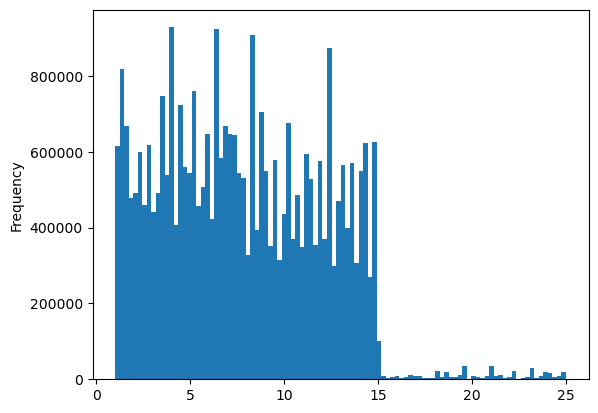

In [16]:
# Creating a histogram for prices colums
histogram_prices = df_ords_prods_cust['prices'].plot.hist(bins = 100)

In [18]:
# Creating a subset
df_ords_prods_cust[:2000000]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,average_order_flag,median_prior_order,frequency_order_flag,gender,state,age,date_joined,n_dependants,marital_status,income
0,2539329,1,1,2,8,-1.0,False,196,1,0,...,Low spender,18.457627,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Low spender,18.457627,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,False,196,1,1,...,Low spender,18.457627,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Low spender,18.457627,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,False,196,1,1,...,Low spender,18.457627,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,943182,11310,7,2,8,18.0,False,7987,2,1,...,Low spender,15.307692,Regular customer,Male,Pennsylvania,57,11/1/2017,0,single,50117
1999996,2758992,11310,14,3,14,7.0,False,7987,1,1,...,Low spender,15.307692,Regular customer,Male,Pennsylvania,57,11/1/2017,0,single,50117
1999997,1052371,11310,8,4,8,23.0,False,14467,4,0,...,Low spender,15.307692,Regular customer,Male,Pennsylvania,57,11/1/2017,0,single,50117
1999998,1495411,11310,13,3,16,7.0,False,18023,4,0,...,Low spender,15.307692,Regular customer,Male,Pennsylvania,57,11/1/2017,0,single,50117


In [19]:
# Create a list holding True/False values to the test np.random.rant() <= 0.8
dev = np.random.rand(len(df_ords_prods_cust)) <= 0.8

In [20]:
# Checking the list
dev

array([ True,  True,  True, ...,  True,  True,  True])

In [21]:
np.random.rand(10)

array([0.94388166, 0.18890079, 0.45226986, 0.38306115, 0.89331056,
       0.54378416, 0.13564604, 0.40513981, 0.32351143, 0.38546826])

In [22]:
# Store 80% of the sample in a big dataframe
big_sample = df_ords_prods_cust[dev]

In [23]:
# Store 20% of the sample in a small dataframe
small_sample = df_ords_prods_cust[~dev]

In [25]:
len(df_ords_prods_cust)

32404859

In [26]:
# Checking if the sum of both creates the same amount
len(big_sample) + len(small_sample)

32404859

In [27]:
df_2 = small_sample[['orders_day_of_week','prices']]

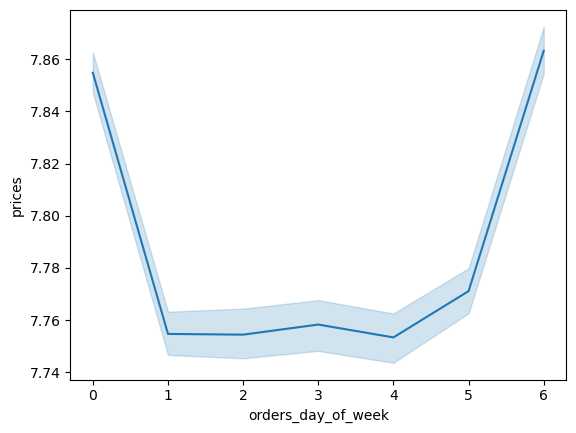

In [28]:
# Creating the chart
line_chart_day_prices = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

Q3. You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.

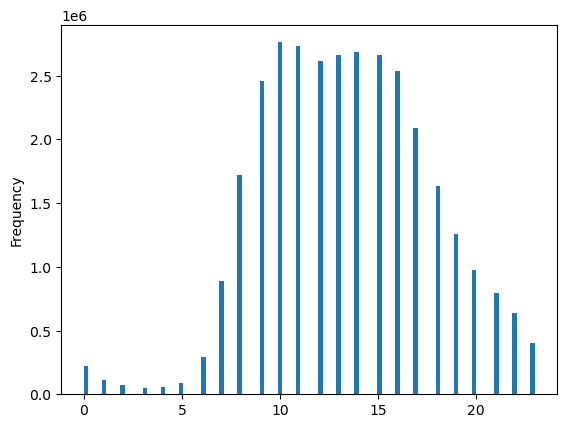

In [29]:
# Creating a histogram for "order_hour_of_day"
histogram_hours = df_ords_prods_cust['order_hour_of_day'].plot.hist(bins = 100)

The histogram above shows how us the frequency of orders throughout the day in the entire dataset.

Q4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

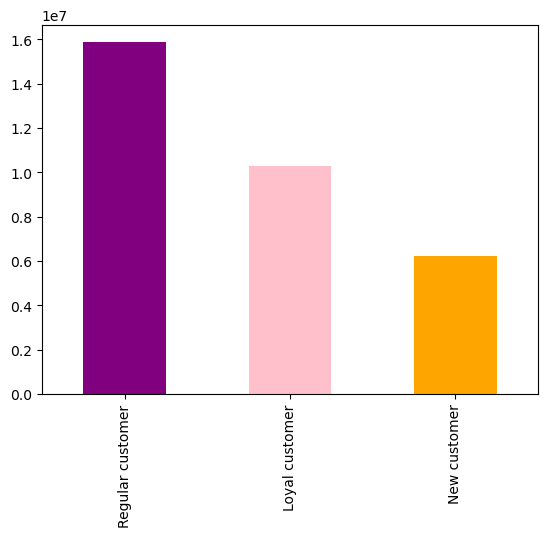

In [30]:
# Create a bar chart with colours of "loyalty_flag"column
barchart_loyalty = df_ords_prods_cust['loyalty_flag'].value_counts().plot.bar(color =['purple','pink','orange'])

Q5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [31]:
# Creating a line chart
df_day_prices = small_sample[['order_hour_of_day','prices']]

In [32]:
df_day_prices.head()

,order_hour_of_day,prices
4,15,9.0
14,7,4.4
18,14,4.4
25,7,3.0
32,16,3.0


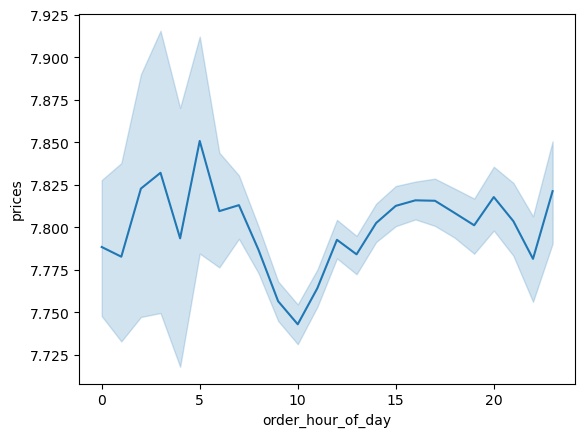

In [33]:
line_chart_hour_prices = sns.lineplot(data = df_day_prices, x = 'order_hour_of_day',y = 'prices')

The above line chart shows how prices fluctuate throughout the course of a day.

Q6. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:

In [34]:
# Creating a subset for the demographics line chart 
df_age_deps = small_sample[['age','n_dependants']]

In [35]:
df_age_deps.head()

,age,n_dependants
4,31,3
14,31,3
18,31,3
25,31,3
32,31,3


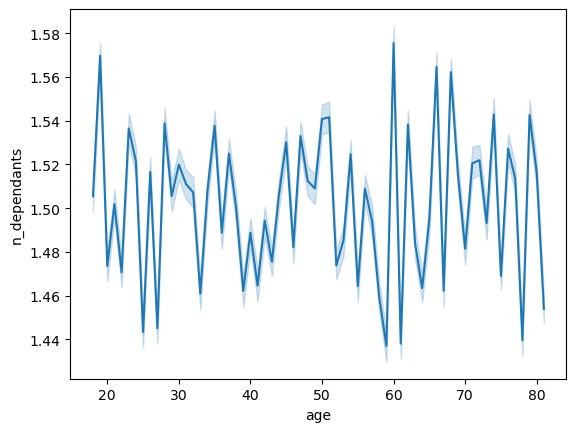

In [36]:
# Creating " age_dependants" line chart 
line_chart_age_deps = sns.lineplot(data = df_age_deps, x = 'age',y = 'n_dependants')

The above line chart shows the amount of dependents based on age. That chart is quite messy, thus drawing any conclusions from it is problematic.

Q7. You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

In [37]:
# Defining the subset for the "age_income" scatterplot
df_age_inc = small_sample[['age','income']]

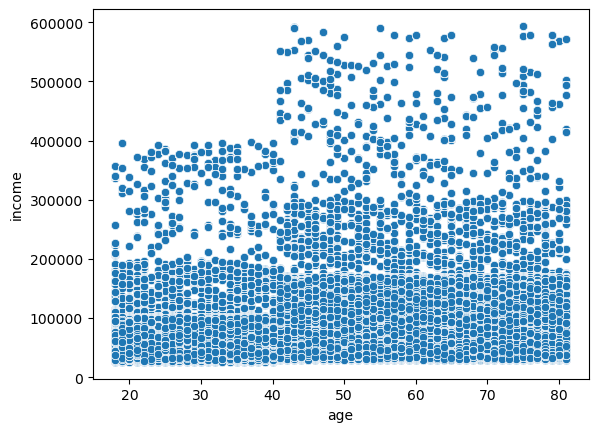

In [38]:
# creating scatterplot
scatterplot_age_inc = sns.scatterplot(x = 'age', y = 'income', data = df_age_inc)

Age and income are represented as variables in the scatter plot above. There is a positive correlation between age and income. Those under the age of 40 have lower income values, whilst those over that age have much higher incomes.

# 0.4 Export visualizations

In [39]:
bar_odow.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_ords_of_week.png'))

In [40]:
scatterplot_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_prices.png'))

In [41]:
histogram_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram_prices.png'))

In [42]:
line_chart_day_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_chart_day_prices.png'))

In [43]:
histogram_hours.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram_hours.png'))

In [44]:
barchart_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barchart_loyalty.png'))

In [45]:
line_chart_hour_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_chart_hour_prices'))

In [46]:
line_chart_age_deps.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_chart_age_deps'))

In [47]:
scatterplot_age_inc.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_inc'))